In [45]:
import cv2
import os
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [46]:
getcwd = os.getcwd()
Folder_PATH = os.path.join(getcwd,"realistic")
IMAGE_PATH = os.path.join(Folder_PATH,"p4.jpg") 
p_values = np.linspace(0.1,0.99,20)

### reading image function :

In [47]:
def readfile(Image_path):
    img_original = cv2.imread(Image_path, cv2.IMREAD_GRAYSCALE)

    if img_original is None:
        raise FileNotFoundError(f"Image not found at path: {Image_path}")

    print("Image loaded successfully!")

   
    img_processed = img_original.astype(np.float64)

    img_processed = img_processed / 255.0

    plt.imshow(img_processed, cmap='gray')
    plt.title("Loaded and Prepared Image")
    plt.axis('off')
    plt.show()
    
    return img_processed

Image loaded successfully!


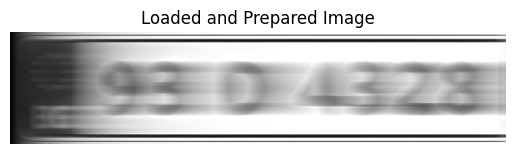

In [48]:
file =readfile(IMAGE_PATH)

### deblur function with parameter P (for p) and axis (horizonal / vertical deblurring) :

here $axis = 1$ means horizonal deblurring //
 $axis = 0$ means vertical deblurring

In [49]:
def deblur_with_p(blurred_image, p, axis):
    
    # Define the filter 
    numerator_coeffs = [1 / (1 - p), -p / (1 - p)]
    denominator_coeffs = [1]                     

    # Apply the 1D filter to each row of the 2D image.
    deblurred_image = np.apply_along_axis(
        lambda row: lfilter(numerator_coeffs, denominator_coeffs, row),
        axis, 
        arr=blurred_image
    )
    
    return deblurred_image

### testing some p values for a sample image :

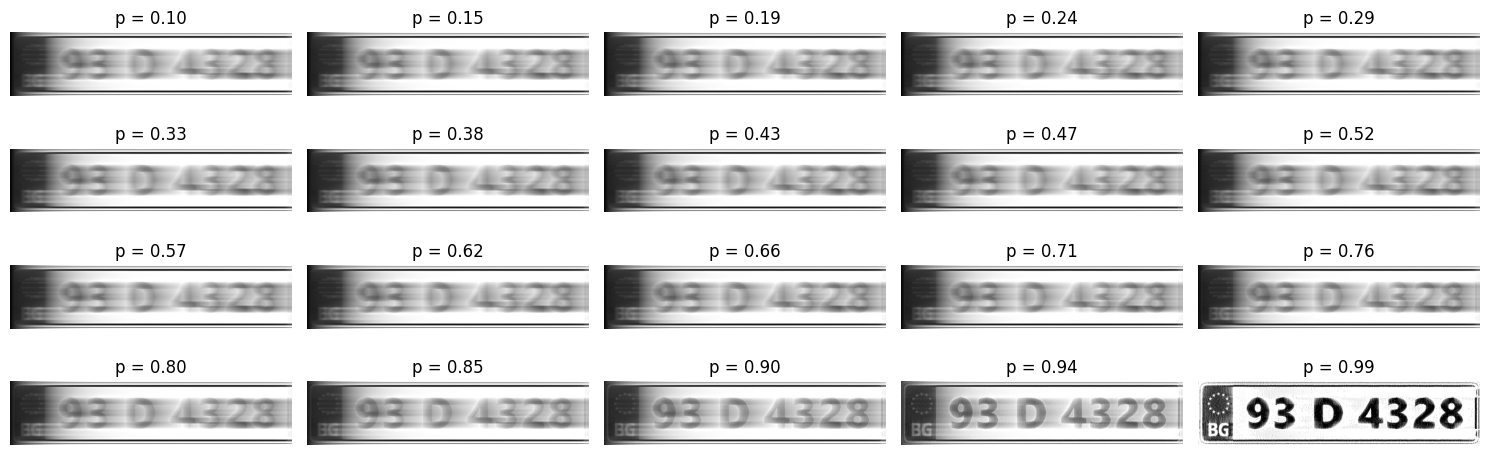

In [50]:
fig, axes = plt.subplots(4, 5, figsize=(15, 5))
axes = axes.flatten()

# Deblurring with different values of p
for p, ax in zip(p_values, axes):
    deblurred_image = deblur_with_p(file, p, 1)
    deblurred_image_float = np.clip(deblurred_image, 0, 1)
    ax.imshow(deblurred_image_float, cmap='gray')
    ax.set_title(f'p = {p:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### find the best results from samples :

Image loaded successfully!


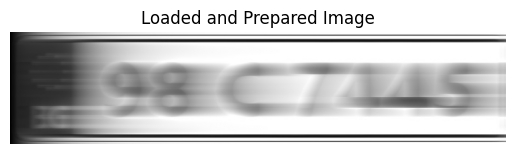

True

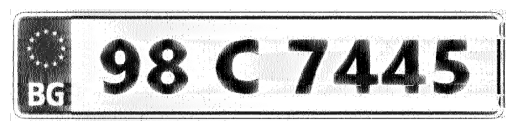

In [51]:
IMAGE_PATH = os.path.join(Folder_PATH,"p1.jpg") 
file = readfile(IMAGE_PATH)
deblurred_image = deblur_with_p(file, 0.99, 1)
deblurred_image_float = np.clip(deblurred_image, 0, 1)
plt.imshow(deblurred_image_float, cmap='gray')
plt.axis('off')

image_to_save = (deblurred_image_float * 255).astype(np.uint8)
save = os.path.join(getcwd,"results","p1.jpg")
cv2.imwrite(save, image_to_save)

Image loaded successfully!


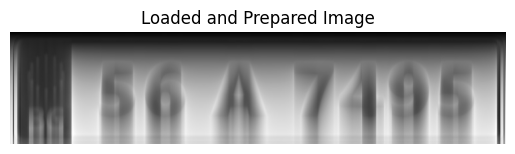

True

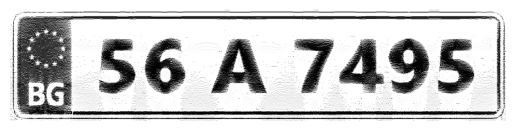

In [52]:
IMAGE_PATH = os.path.join(Folder_PATH,"p2.jpg") 
file = readfile(IMAGE_PATH)
deblurred_image = deblur_with_p(file,0.99,0 )
deblurred_image_float = np.clip(deblurred_image, 0, 1)
plt.imshow(deblurred_image_float, cmap='gray')
plt.axis('off')

image_to_save = (deblurred_image_float * 255).astype(np.uint8)
save = os.path.join(getcwd,"results","p2.jpg")
cv2.imwrite(save, image_to_save)

Image loaded successfully!


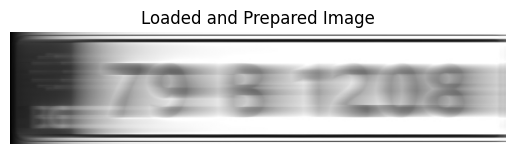

True

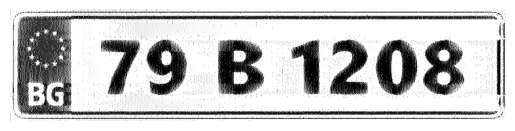

In [53]:
IMAGE_PATH = os.path.join(Folder_PATH,"p3.jpg") 
file = readfile(IMAGE_PATH)
deblurred_image = deblur_with_p(file,0.99,1)
deblurred_image_float = np.clip(deblurred_image, 0, 1)
plt.imshow(deblurred_image_float, cmap='gray')
plt.axis('off')

image_to_save = (deblurred_image_float * 255).astype(np.uint8)
save = os.path.join(getcwd,"results","p3.jpg")
cv2.imwrite(save, image_to_save)

Image loaded successfully!


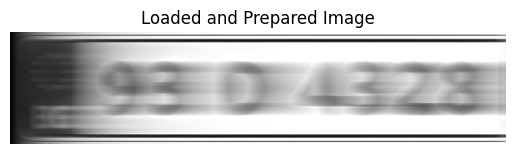

True

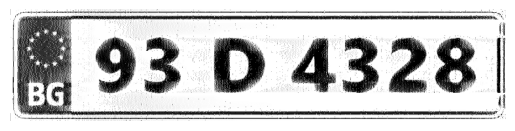

In [54]:
IMAGE_PATH = os.path.join(Folder_PATH,"p4.jpg") 
file = readfile(IMAGE_PATH)
deblurred_image = deblur_with_p(file,0.99,1)
deblurred_image_float = np.clip(deblurred_image, 0, 1)
plt.imshow(deblurred_image_float, cmap='gray')
plt.axis('off')

image_to_save = (deblurred_image_float * 255).astype(np.uint8)
save = os.path.join(getcwd,"results","p4.jpg")
cv2.imwrite(save, image_to_save)

### final Images :

image 1 : 

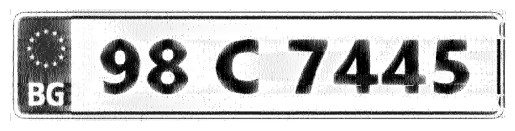

image 2 :

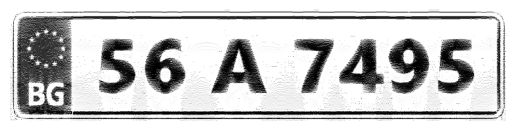

image 3 :

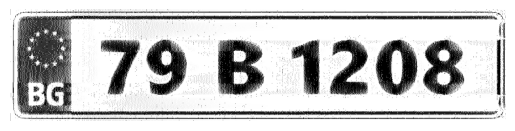

image 4 :

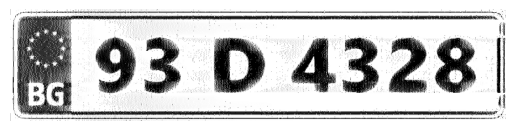

## Bouns point :

Image loaded successfully!


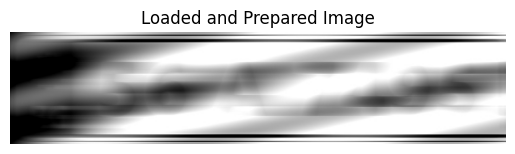

In [55]:
path = os.path.join(getcwd,"noisy","n2.jpg")
file = readfile(path)

here we apply deblurring two times.

one step,vertical and another time, horizonal 

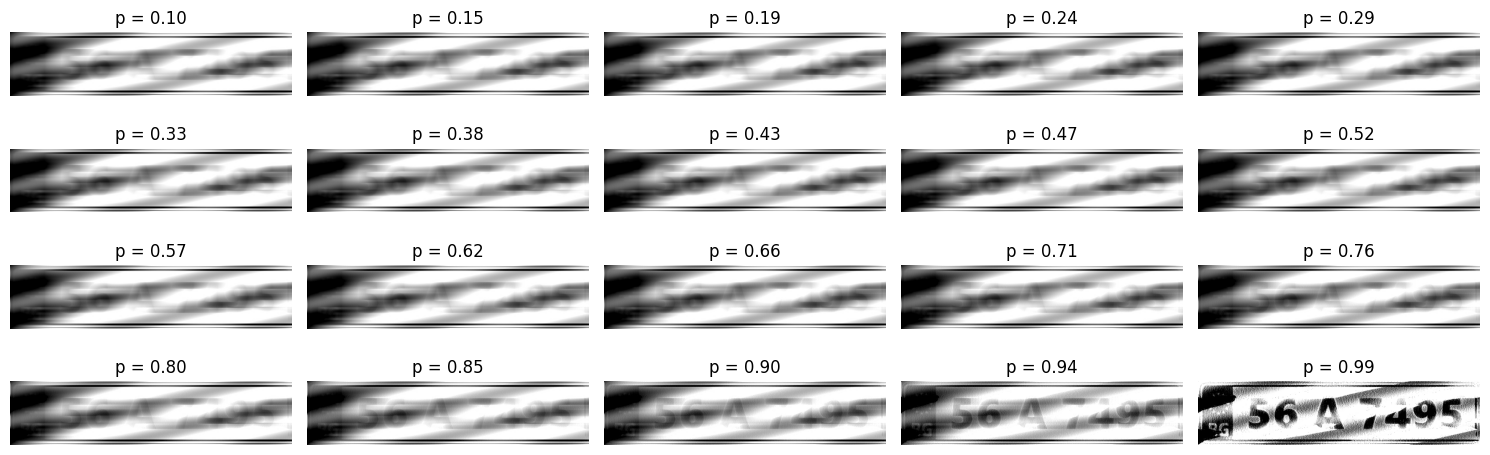

In [56]:
fig, axes = plt.subplots(4, 5, figsize=(15, 5))
axes = axes.flatten()

# Deblurring with different values of p
for p, ax in zip(p_values, axes):
    deblurred_image = deblur_with_p(file, p, 1)
    deblurred_image_float = np.clip(deblurred_image, 0, 1)
    ax.imshow(deblurred_image_float, cmap='gray')
    ax.set_title(f'p = {p:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### testing with some p values :

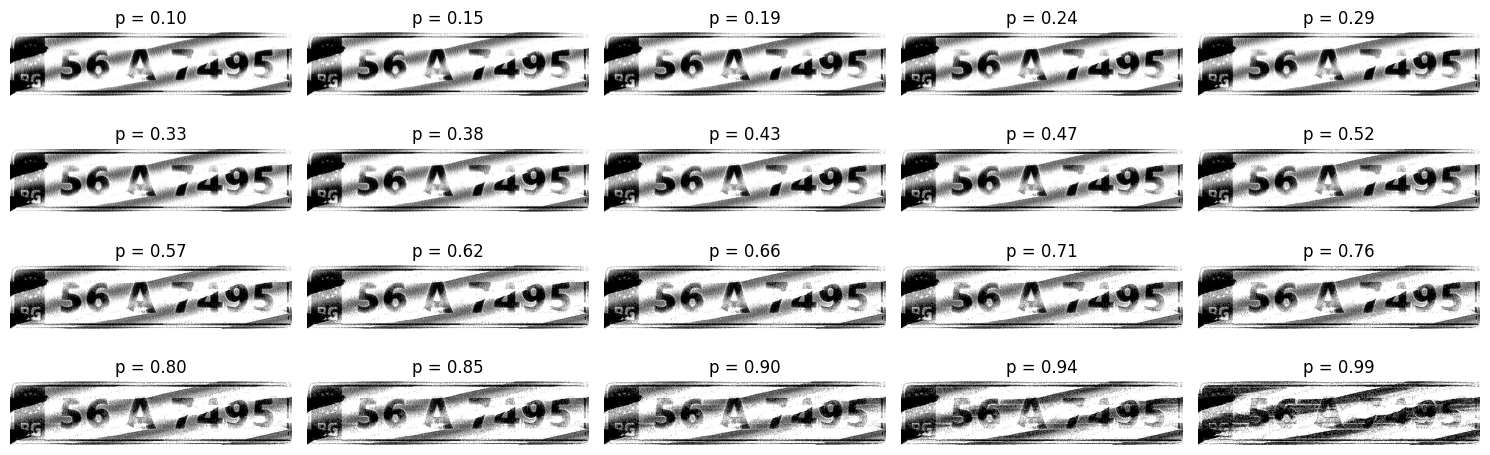

True

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 5))
axes = axes.flatten()
file = deblurred_image_float
# Deblurring with different values of p
for p, ax in zip(p_values, axes):
    deblurred_image = deblur_with_p(file, p, 0)
    deblurred_image_float = np.clip(deblurred_image, 0, 1)
    ax.imshow(deblurred_image_float, cmap='gray')
    ax.set_title(f'p = {p:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### final result :

True

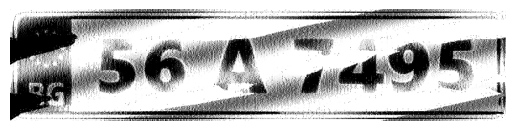

In [58]:
deblurred_image = deblur_with_p(file,0.10,0 )
deblurred_image_float = np.clip(deblurred_image, 0, 1)
plt.imshow(deblurred_image_float, cmap='gray')
plt.axis('off')

image_to_save = (deblurred_image_float * 255).astype(np.uint8)
save = os.path.join(getcwd,"results","bouns.jpg")
cv2.imwrite(save, image_to_save)

so the the second picture (n2.jpg) is less noisy becuase with this methode we can find the numbers and letter. but we can't find out the first one (n1.jpg)